IMPORTING AND EXPLORING THE DATASET

In [33]:
# IMPORTING PANDAS 

import pandas as pd

In [34]:
# LOADING THE DATASET 

data = pd.read_csv('signal-data.csv')

In [35]:
# DISPLAYING THE BASIC INFORMATION ABOUT THE DATASET FOR BETTER UNDERSTANDING

data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Head": data.head(),
    "Missing Values": data.isnull().sum().sum(),
    "Data Types": data.dtypes,
    "Data Description": data.describe()
}

data_info

{'Shape': (1567, 592),
 'Columns': ['Time',
  '0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '1

DATA CLEANSING

In [36]:
# TREATING THE MISSING VALUES

# REPLACING THE MISSING VALUES WITH COLUMN MEDIANS

# EXCLUDING THE 'Pass/Fail' AND 'Time' COLUMNS FROM IMPUTATION

data_imputed = data.copy()
for col in data_imputed.columns:
    if col not in ['Pass/Fail', 'Time']:
        data_imputed[col] = data_imputed[col].fillna(data_imputed[col].median())

In [37]:
# VERIFYING IF ALL THE MISSING VALUES ARE TREATED CORRECTLY

missing_after_imputation = data_imputed.isnull().sum().sum()
missing_after_imputation

0

DATA ANALYSIS & VISUALISATION

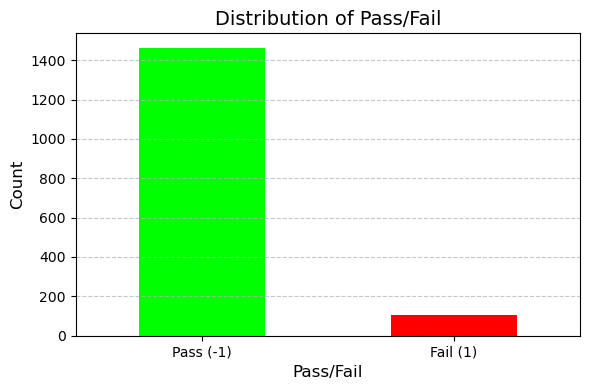

In [38]:
# ANALYZING THE DISTRIBUTION OF THE TARGET VARIABLE 'Pass/Fail'

target_distribution = data_imputed['Pass/Fail'].value_counts()

# IMPORTING MATPLOTLIB

import matplotlib.pyplot as plt

# PLOTTING THE DISTRIBUTION OF THE TARGET VARIABLE

plt.figure(figsize=(6, 4))
target_distribution.plot(kind='bar', color=['lime', 'red'])
plt.title('Distribution of Pass/Fail', fontsize=14)
plt.xlabel('Pass/Fail', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Pass (-1)', 'Fail (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
# CHECKING THE UNIQUE VALUES IN 'Time' COLUMN

unique_times = data_imputed['Time'].nunique()
unique_times

1534

In [40]:
# DROPPING THE 'Time' COLUMN

data_prepared = data_imputed.drop(columns=['Time'])

In [41]:
# SEGREGATE PREDICTORS AND TARGET VARIABLE

X = data_prepared.drop(columns=['Pass/Fail'])
y = data_prepared['Pass/Fail']

In [42]:
# IMPORTING SEABORN

import seaborn as sns

Univariate Analysis:


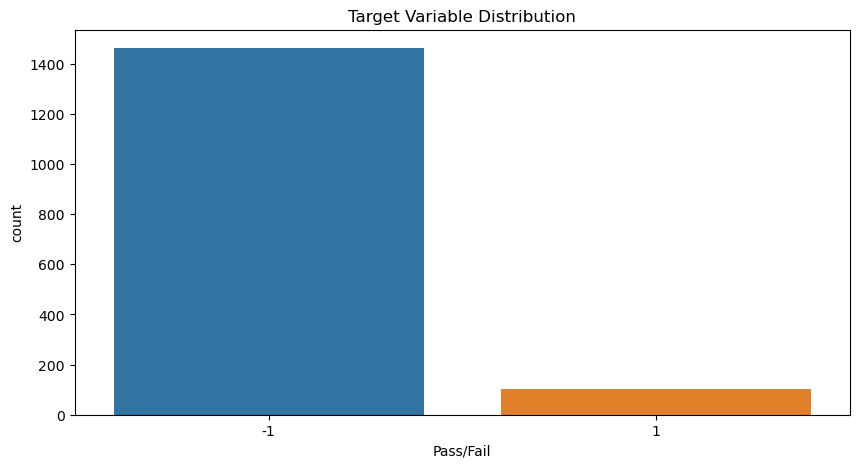

In [43]:
# UNIVARIATE ANALYSIS

print("Univariate Analysis:")
plt.figure(figsize=(10,5))
sns.countplot(x=y)
plt.title("Target Variable Distribution")
plt.show()

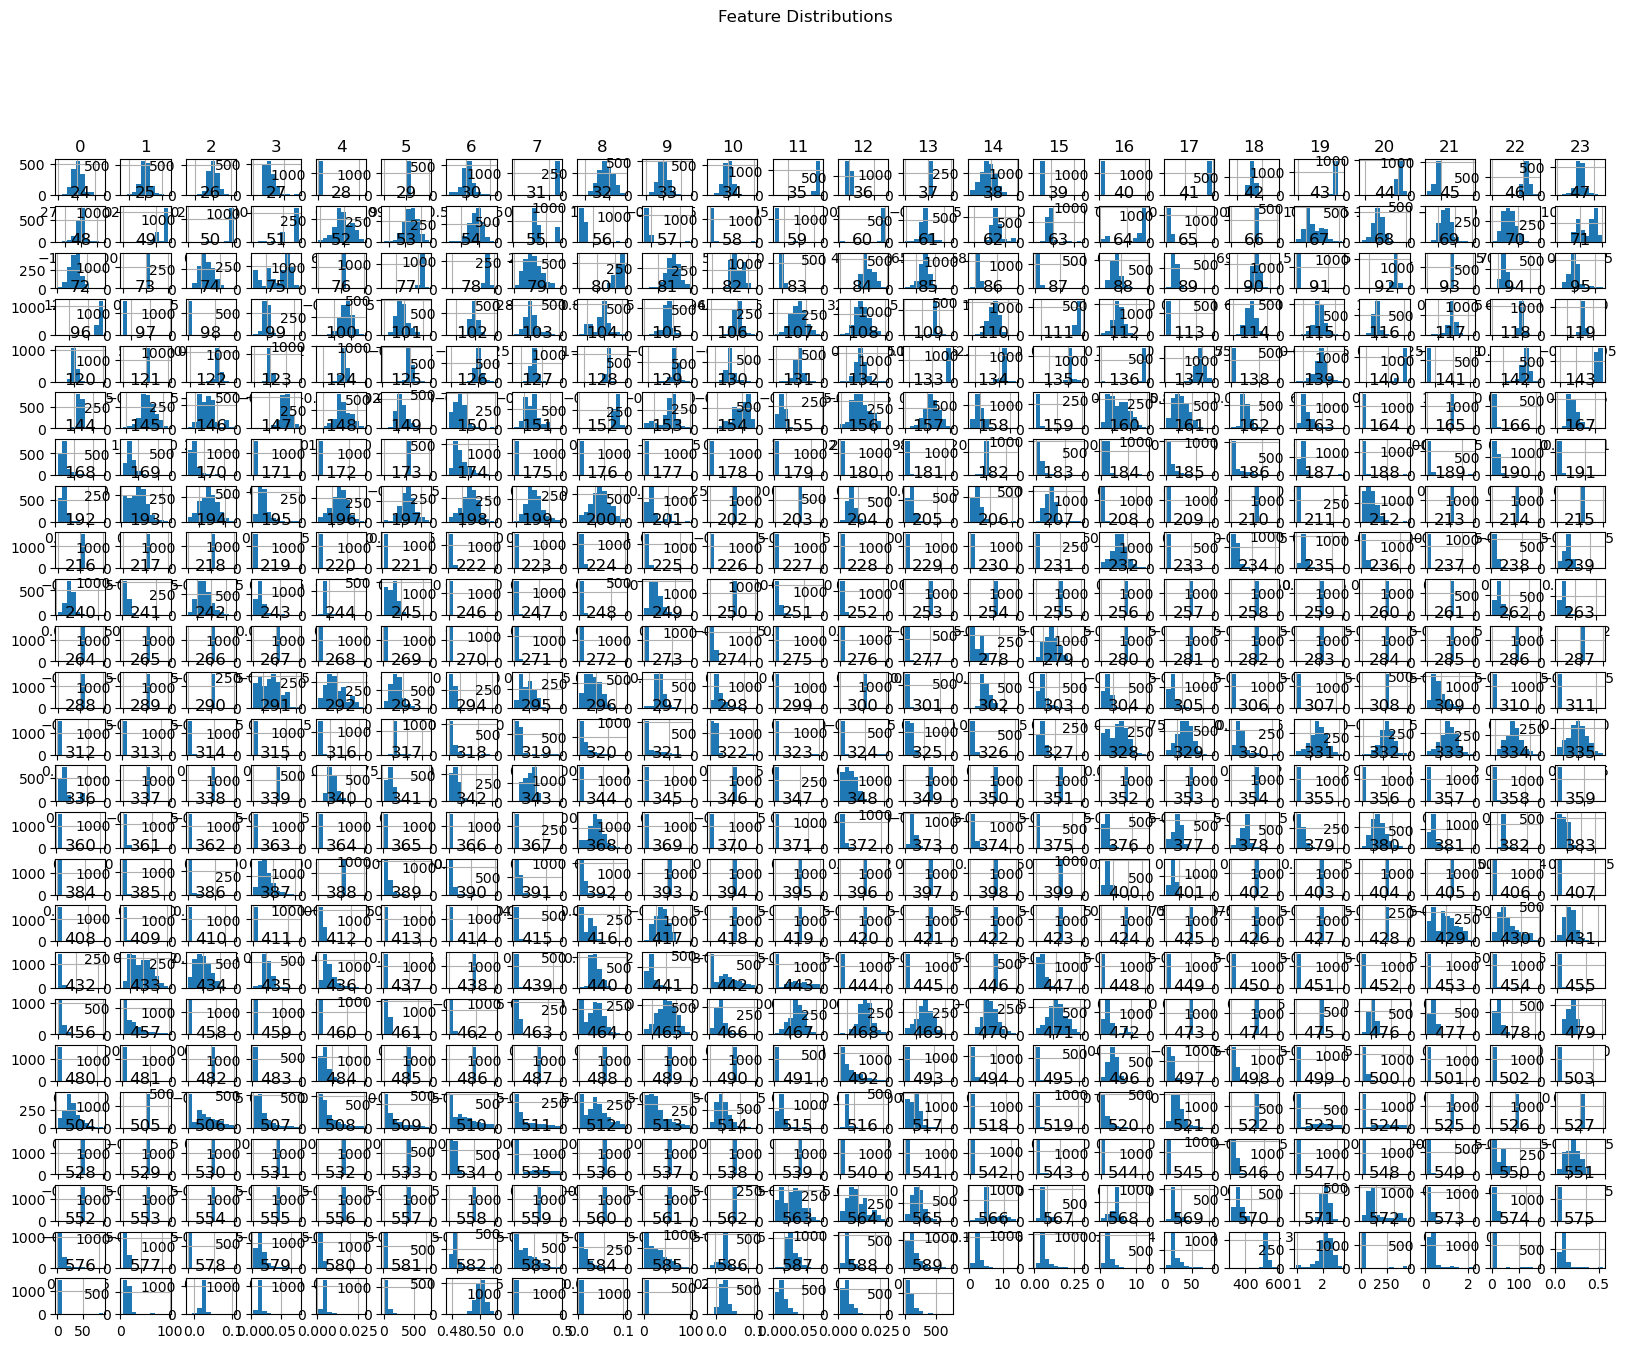

In [44]:
# CHECKING THE FEATURE DISTRIBUTIONS

X.hist(figsize=(20, 15))
plt.suptitle("Feature Distributions") 
plt.show()

Bivariate Analysis:


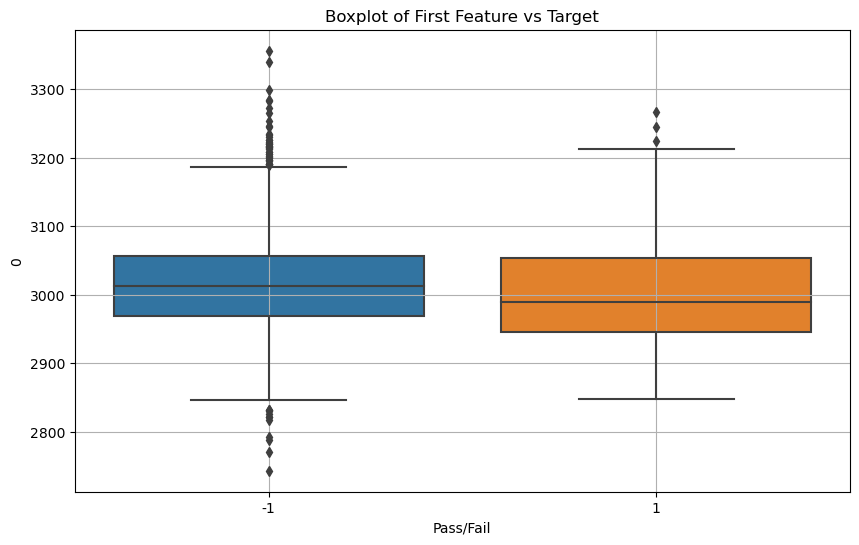

In [45]:
# BIVARIATE ANALYSIS

print("Bivariate Analysis:")
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Pass/Fail'], y=X.iloc[:, 0])
plt.title("Boxplot of First Feature vs Target")
plt.grid(True)
plt.show()

Multivariate Analysis:


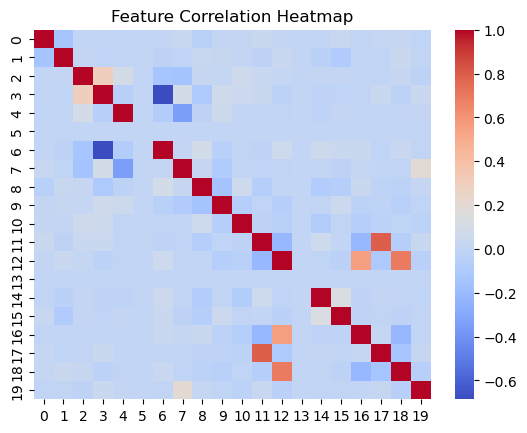

In [46]:
# MULTIVARIATE ANALYSIS

print("Multivariate Analysis:")
corr_matrix = X.corr()

# FILLING THE NaNs WITH 0

corr_matrix.fillna(0, inplace=True) 

sns.heatmap(corr_matrix.iloc[:20, :20], cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

DATA PRE-PROCESSING

In [47]:
# CHECKING AND HANDLING TARGET IMBALANCE

# IMPORTING SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
print(smote)

SMOTE(random_state=42)


In [48]:
# IMPORTING SKLEARN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [49]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

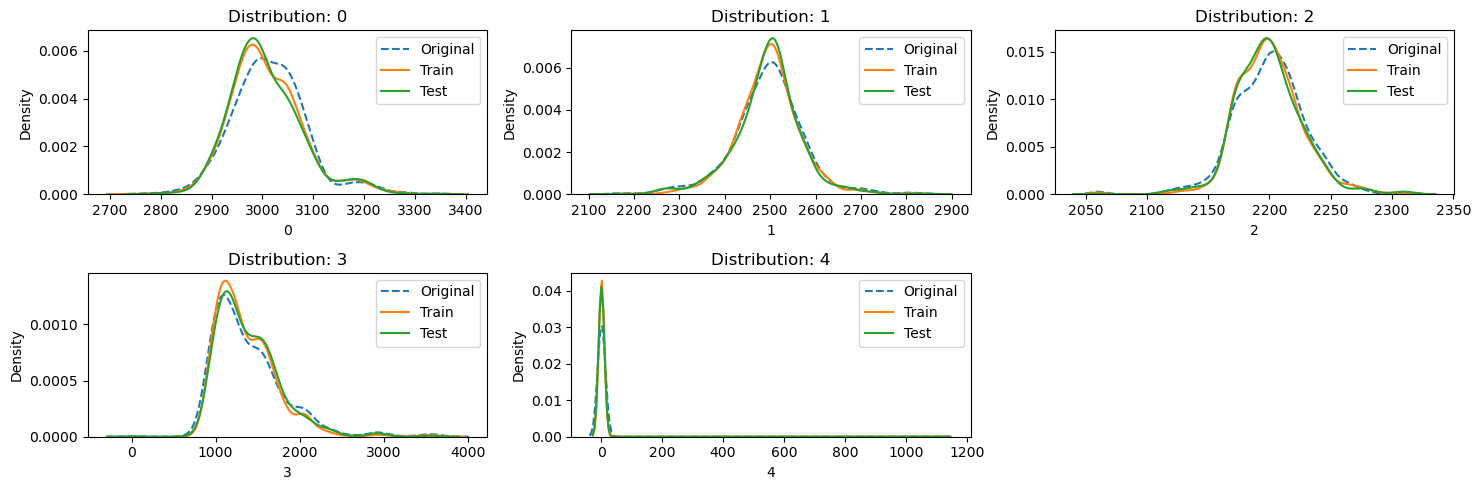


Kolmogorov-Smirnov Test Results:
0: Train p-value=0.0004, Test p-value=0.0000
1: Train p-value=0.2472, Test p-value=0.2435
2: Train p-value=0.0390, Test p-value=0.0130
3: Train p-value=0.0617, Test p-value=0.0336
4: Train p-value=0.0136, Test p-value=0.0352
5: Train p-value=1.0000, Test p-value=1.0000
6: Train p-value=0.0060, Test p-value=0.0000
7: Train p-value=0.0077, Test p-value=0.1066
8: Train p-value=0.0001, Test p-value=0.0022
9: Train p-value=0.0024, Test p-value=0.3300
10: Train p-value=0.0369, Test p-value=0.4795
11: Train p-value=0.0000, Test p-value=0.0017
12: Train p-value=0.0145, Test p-value=0.0118
13: Train p-value=1.0000, Test p-value=1.0000
14: Train p-value=0.0040, Test p-value=0.0194
15: Train p-value=0.0019, Test p-value=0.0668
16: Train p-value=0.0377, Test p-value=0.0605
17: Train p-value=0.0000, Test p-value=0.0029
18: Train p-value=0.0228, Test p-value=0.0121
19: Train p-value=0.0000, Test p-value=0.0272
20: Train p-value=0.1231, Test p-value=0.4404
21: Train 

In [50]:
# CHECKING FOR TRAIN AND TEST DATA SIMILARITIES BY COMPARING WITH THE ORIGINAL DATA

# PLOTTING DISTRIBUTION COMPARISON

plt.figure(figsize=(15, 5))
for i, column in enumerate(X.columns[:5]): # COMPARING FIRST 5 FEATURES ONLY
    plt.subplot(2, 3, i+1)
    sns.kdeplot(X[column], label="Original", linestyle="--")
    sns.kdeplot(pd.DataFrame(X_train, columns=X.columns)[column], label="Train")
    sns.kdeplot(pd.DataFrame(X_test, columns=X.columns)[column], label="Test")
    plt.title(f"Distribution: {column}")
    plt.legend()

plt.tight_layout()
plt.show()

# PERFORMING KOLMOGOROV-SMIRNOV TEST FOR DISTRIBUTION SIMILARITY

from scipy import stats

print("\nKolmogorov-Smirnov Test Results:")
for column in X.columns:
    ks_train = stats.ks_2samp(X[column], pd.DataFrame(X_train, columns=X.columns)[column])
    ks_test = stats.ks_2samp(X[column], pd.DataFrame(X_test, columns=X.columns)[column])
    print(f"{column}: Train p-value={ks_train.pvalue:.4f}, Test p-value={ks_test.pvalue:.4f}")

MODEL TRAINING, TESTING AND TUNING

In [51]:
# STANDARDIZING THE DATA

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# INITIALIZING THE MODELS

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB()
}

In [53]:
# HYPERPARAMETER TUNING

param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 20, None]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_model = model
        


Training Random Forest...
Training SVM...
Training Naive Bayes...


In [54]:
# PREDICTIONS AND EVALUATION

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# STORING THE RESULTS

results[model_name] = {
        'Best Model': best_model,
        'Accuracy': accuracy,
        'Classification Report': report
}

In [55]:
# COMPARING MODELS

for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Classification Report:\n{result['Classification Report']}")


Model: Naive Bayes
Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.20      0.33       449
           1       0.54      0.99      0.70       429

    accuracy                           0.59       878
   macro avg       0.76      0.60      0.52       878
weighted avg       0.76      0.59      0.51       878



In [56]:
# ENHANCING THE MODEL PERFORMANCE USING PCA (A DIMENSIONALITY REDUCTION METHOD)

# IMPORTING PCA

from sklearn.decomposition import PCA

In [57]:
# APPLYING PCA

pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# NUMBER OF PRINCIPAL COMPONENTS SELECTED

print(f"Number of Principal Components retained: {pca.n_components_}")

# TRAINING THE MODELS AGAIN USING PCA-TRANSFORMED DATA

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB()
}

results_pca = {}

for model_name, model in models.items():
    print(f"Training {model_name} with PCA-transformed data...")
    model.fit(X_train_pca, y_train)
    
# PREDICTING AND EVALUATING

    y_pred_pca = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred_pca)
    report = classification_report(y_test, y_pred_pca)
    results_pca[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# COMPARING MODELS AFTER PCA

for model_name, result in results_pca.items():
    print(f"\nModel: {model_name} (with PCA)")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Classification Report:\n{result['Classification Report']}")

Number of Principal Components retained: 154
Training Random Forest with PCA-transformed data...
Training SVM with PCA-transformed data...
Training Naive Bayes with PCA-transformed data...

Model: Random Forest (with PCA)
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       449
           1       1.00      0.99      1.00       429

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878


Model: SVM (with PCA)
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.97      0.98       449
           1       0.97      1.00      0.98       429

    accuracy                           0.98       878
   macro avg       0.98      0.98      0.98       878
weighted avg       0.98      0.98      0.98       878


Model: Naive Bayes (with

In [58]:
# IDENTIFYING THE BEST MODEL BASED ON ACCURACY

best_model_name = max(results_pca, key=lambda x: results_pca[x]['Accuracy'])
best_model = results_pca[best_model_name]

# IMPORTING JOBLIB

import joblib

# SAVING THE FINAL BEST MODEL

joblib.dump(best_model, 'best_model.pkl')

print(f"\n{best_model_name} saved as 'best_model.pkl'.")


Random Forest saved as 'best_model.pkl'.


CONCLUSION AND IMPROVISATION

CONCLUSION -

THE THREE MACHINE LEARNING MODELS (RANDOM FOREST, SVM, AND NAIVE BAYES) HAVE BEEN USED FOR TRAINING THE PCA-TRANSFORMED DATA. THE METRICS USED FOR EVALUATING ACCURACY, PRECISION, RECALL, AND F1-SCORE.

RANDOM FOREST (WITH PCA) -

- ACCURACY: 1.00 (100%), PRECISION, RECALL AND F1-SCORE ARE ALL 1.00 OR VERY CLOSE, FOR BOTH CLASSES (-1 AND 1), WHICH MEANS, THE MODEL IS CLASSIFYING ALL INSTANCES CORRECTLY.  

SVM (WITH PCA) -

- ACCURACY: 0.98 (98%), PRECISION AND RECALL ARE CLOSE TO 1.00, THE F1-SCORE IS 0.98, WHICH ALSO INDICATING A VERY HIGH MODEL PERFORMANCE BUT SLIGHTLY LOWER THAN THE RANDOM FOREST AND ALSO MAKES FEW CLASSIFICATION ERRORS TOO.

NAIVE BAYES (WITH PCA) -

- ACCURACY: 0.94 (94%), SLIGHTLY LOWER RECALL FOR CLASS 1 (0.89) COMPARED TO PRECISION (0.98) AND THE OVERALL F1-SCORE IS 0.94, WHICH IS STILL VERY GOOD BUT LOWER THAN THE OTHER TWO MODELS.  

SUMMARY -

- RANDOM FOREST PERFORMED THE BEST, ACHIEVING A PERFECT CLASSIFICATION ACCURACY OF 100%.  
- SVM ALSO PERFORMED VERY WELL WITH 98% ACCURACY, SLIGHTLY MISCLASSIFYING SOME INSTANCES.  
- NAIVE BAYES HAD THE LOWEST ACCURACY (94%), COMPARED TO THE OTHER MODELS.  

FINAL BEST MODEL -

- THUS, RANDOM FOREST IS THE BEST CHOICE AMONG THE THREE MODELS FOR THIS DATASET AS IT PROVIDES PERFECT CLASSIFICATION.  
